1.3.1


Расстояния между точками:

Между точками A и B:
Евклидово расстояние: 4.69
Манхэттенское расстояние: 8.00
Расстояние Чебышева: 3.00
Квадрат евклидова расстояния: 22.00

Между точками A и C:
Евклидово расстояние: 3.61
Манхэттенское расстояние: 5.00
Расстояние Чебышева: 3.00
Квадрат евклидова расстояния: 13.00

Между точками A и D:
Евклидово расстояние: 4.58
Манхэттенское расстояние: 7.00
Расстояние Чебышева: 4.00
Квадрат евклидова расстояния: 21.00

Между точками B и C:
Евклидово расстояние: 5.92
Манхэттенское расстояние: 9.00
Расстояние Чебышева: 5.00
Квадрат евклидова расстояния: 35.00

Между точками B и D:
Евклидово расстояние: 7.68
Манхэттенское расстояние: 11.00
Расстояние Чебышева: 7.00
Квадрат евклидова расстояния: 59.00

Между точками C и D:
Евклидово расстояние: 6.93
Манхэттенское расстояние: 12.00
Расстояние Чебышева: 4.00
Квадрат евклидова расстояния: 48.00


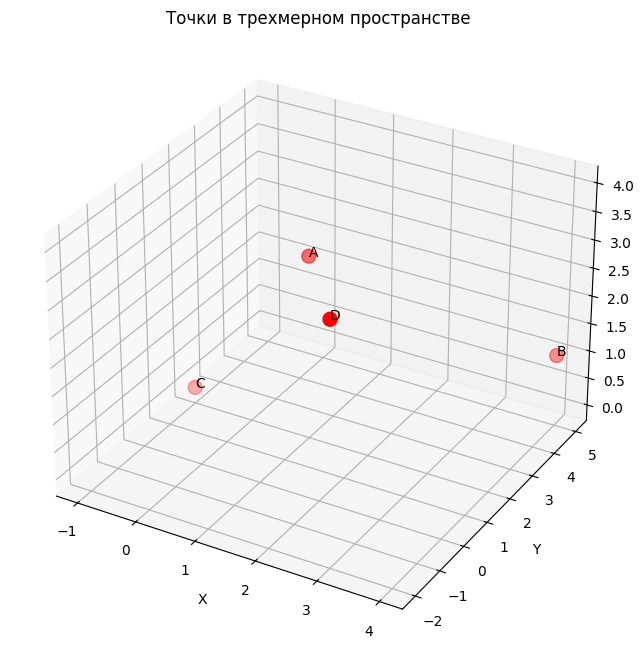

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import euclidean, cityblock, chebyshev

# Задаем 4 точки в трехмерном пространстве
points = np.array([
    [1, 2, 3],    # точка A
    [4, 5, 1],    # точка B
    [-1, 2, 0],   # точка C
    [3, -2, 4]    # точка D
])

# Создаем 3D график
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Отображаем точки
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='r', marker='o', s=100)

# Подписываем точки
labels = ['A', 'B', 'C', 'D']
for i, label in enumerate(labels):
    ax.text(points[i, 0], points[i, 1], points[i, 2], label)

# Настраиваем график
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Точки в трехмерном пространстве')

# Рассчитываем расстояния между всеми парами точек
print("\nРасстояния между точками:")
for i in range(len(points)):
    for j in range(i+1, len(points)):
        p1, p2 = points[i], points[j]
        print(f"\nМежду точками {labels[i]} и {labels[j]}:")
        print(f"Евклидово расстояние: {euclidean(p1, p2):.2f}")
        print(f"Манхэттенское расстояние: {cityblock(p1, p2):.2f}")
        print(f"Расстояние Чебышева: {chebyshev(p1, p2):.2f}")
        print(f"Квадрат евклидова расстояния: {euclidean(p1, p2)**2:.2f}")

plt.show()


1.3.2

,sepal_length,sepal_width,petal_length,petal_width
21,5.1,3.7,1.5,0.4
60,5.0,2.0,3.5,1.0
50,7.0,3.2,4.7,1.4
101,5.8,2.7,5.1,1.9
68,6.2,2.2,4.5,1.5


21         setosa
60     versicolor
50     versicolor
101     virginica
68     versicolor
Name: species, dtype: object

1
accuracy: 1.0
5
accuracy: 1.0
10
accuracy: 1.0


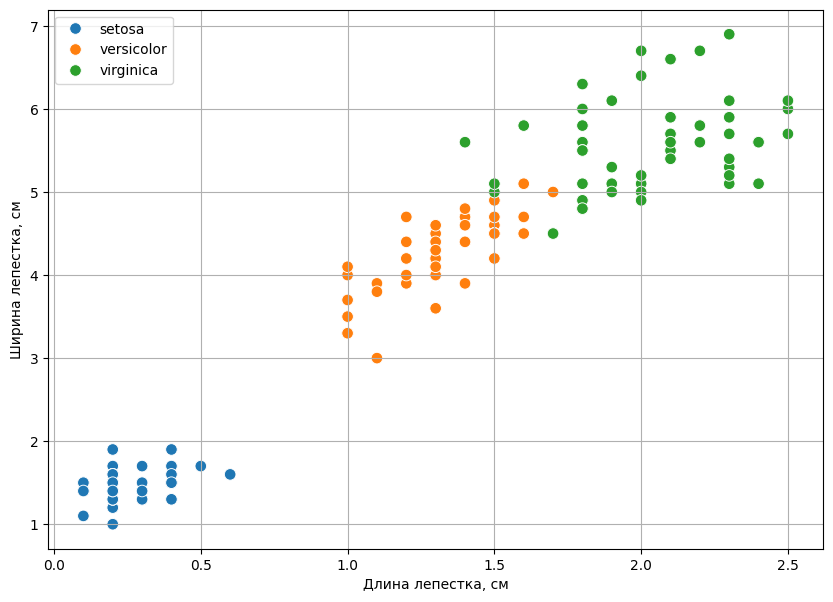

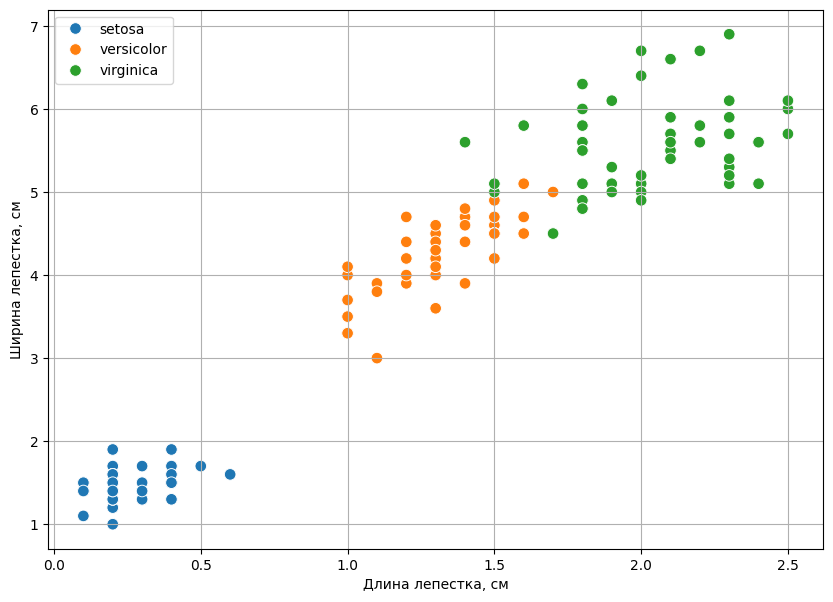

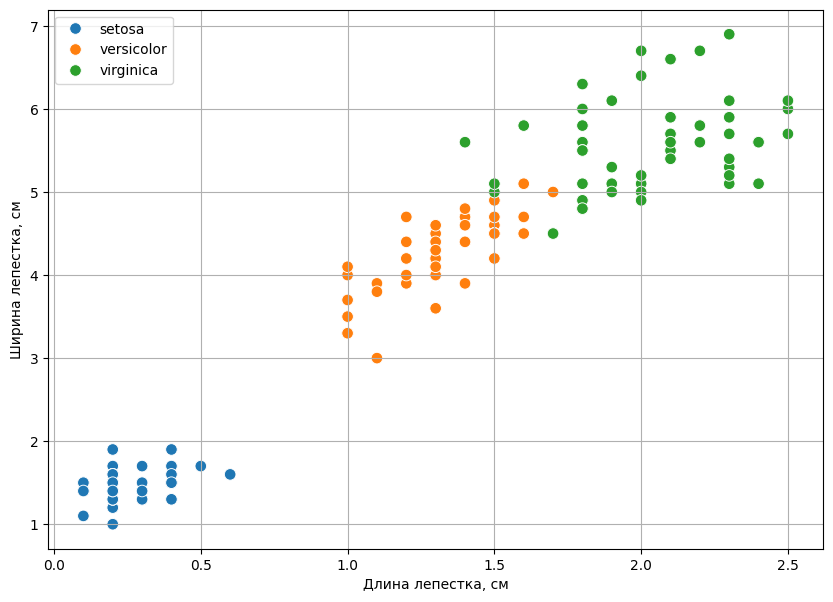

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knc
import seaborn as sns
from sklearn.metrics import accuracy_score as a_s
from sklearn.feature_extraction import DictVectorizer
iris = sns.load_dataset('iris')

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

display(X_train.head())
display(y_train.head())

for h in [1, 5, 10]:
    print(h)
    model = knc(n_neighbors=h)
    model.fit(X_train, y_train)
    model

    y_pred = model.predict(X_test)
    y_pred

    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        data=iris,
        x='petal_width', y='petal_length',
        hue='species',
        s=70
    )
    plt.xlabel('Длина лепестка, см')
    plt.ylabel('Ширина лепестка, см')
    plt.legend(loc=2)
    plt.grid()

    for i in range(len(y_test)):
        if np.array(y_test)[i] != y_pred[i]:
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=100)

    print(f'accuracy: {a_s(y_test, y_pred) :.3}')